# Multiprocessing and JobLib in python

The **multiprocessing library** is Python's standard library to support parallel computing using processes.

See documentation here:

https://docs.python.org/3/library/multiprocessing.html

In [ ]:
import multiprocessing as mp

Let's first print out the total number of CPUs that on my machine that can be used for parallel computing.

In [ ]:
print(f"Number of CPU cores: {mp.cpu_count()}")

Let's use an example to show you how to use multiple cores in one machine to reduce the time of execution time. 

### Example 1:

Generate $10^7$ random numbers between 0 and 10, and square the number. Store the results in a list. 

#### A) Serial version:

In [3]:
!ls -ltr *.py

In [4]:
import numpy as np
import time
import random_square # our own module

In [5]:
# Timing the code
start = time.time()

# Empty  list for results 
results = []

# Loop up to 10^7

for i in range(10000000): 

    results.append(random_square.random_square(i))

# Finish timing code
end =time.time()

print(f'Serial execution time is {end - start} s')

Serial execution time is 24.14542007446289 s


#### B) Parallel version

The simplest way to do parallel computing using the multiprocessing is to use the **Pool** class.

See documentation:

https://superfastpython.com/multiprocessing-pool-map/

https://docs.python.org/3/library/multiprocessing.html#multiprocessing.pool.Pool


There are 4 common methods in the class that we may use often, that is:

1. **apply**, 


2. **map**, 


3. **apply_async** and 


4. **map_async**.

Have a look of the documentation for the differences, and we will only use **map** function below to parallel the above example.

The **map(func, iterable)** function takes in two arguments, and apply the function **func** to each element in the **iterable**, and then collect the results. 

In [6]:
# Timing the code
start = time.time()

# Get number of laptop CPUs
n_cpu = mp.cpu_count()
print(n_cpu)

# Call Pool
pool = mp.Pool(processes=n_cpu)

# Call pool.map(func, iterable)
results = [pool.map(random_square.random_square, range(10000000))]

# Finish timing code
end = time.time()

print(f'Parallel execution time is {end - start} s')

14
Parallel execution time is 3.150986671447754 s


In [7]:
#Expectation 

print(22.771673917770386/3.792414903640747)

6.0045312805593625


#### Notes:


- We can see that using the above parallel version of the code, we reduce the run time from 59.18333172798157 s to 30.407769918441772 s. This is a big gain in speed, especially if we have a heavy computation, it will reduce a lot of time by running parallel computing. 


- The `pool.apply` function is similar except that it can accept more arguments. The `pool.map` and `pool.apply` will lock the main program until all the processes are finished, which is quite useful if we want to obtain results in a particular order for some applications.


- In contrast, if we do not need the results in a particular order, we can also use `pool.apply_async` or `pool.map_async`, which will submit all processes at once and retrieve the results as soon as they are finished. Check documentation to learn more. 

## Visualise the execution time 

Let's visualise the execution time changes versus the number of data points using both the serial and parallel version.

We will see that until certain point, it is better to use the serial version. 

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Serial function

def serial(n):
    
    start = time.time()
    results = []
    
    for i in range(n): 
        results.append(random_square.random_square(i))
    
    end = time.time()
    exec_time = end - start
    
    return exec_time

# Parallel function

def parallel(n):
    
    start = time.time()
    n_cpu = 8

    pool = mp.Pool(processes=3)
    
    results = [pool.map(random_square.random_square, range(n))]
    
    end = time.time()
    exec_time = end - start
    
    return exec_time

In [10]:
# Generate numbers in log-space:
n_run = np.logspace(1, 7, num = 7)

print(n_run)

# Call functions for each n_run[i]

t_serial = [serial(int(n)) for n in n_run]


t_parallel = [parallel(int(n)) for n in n_run]

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07]


In [11]:
print(t_serial)
print(t_parallel)

[4.506111145019531e-05, 0.00023984909057617188, 0.0023202896118164062, 0.024810075759887695, 0.24115204811096191, 2.4351396560668945, 24.13102912902832]
[0.2540931701660156, 0.21936321258544922, 0.21701407432556152, 0.2644388675689697, 0.36952900886535645, 1.191835880279541, 8.532087087631226]


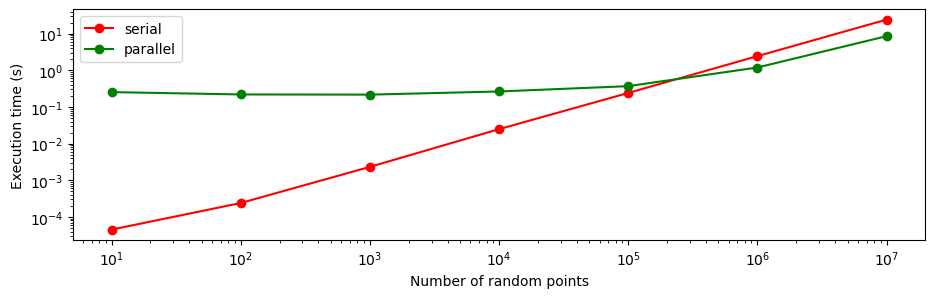

In [12]:
plt.figure(figsize = (11, 3))

plt.plot(n_run, t_serial, '-o', color = "red", label = 'serial')
plt.plot(n_run, t_parallel, '-o', color = "green", label = 'parallel')

plt.loglog()
plt.legend()

plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')

plt.show()

### Conclusion:

We can see from the figure that when the number of data points are small (below 10000), the execution time for the serial version is faster due to the overheads of the parallel version from launching and maintaining the new processes. But after that, we can see clearly the winner be the parallel version. 

# Using joblib


In Python, there are also other 3rd party packages that can make the parallel computing easier, especially for some daily tasks.

**joblib** is one of them, it provides an easy simple way to do parallel computing (it has many other usages as well). 


#### See documentation:

https://joblib.readthedocs.io/en/latest/index.html

First you need to install it by running 

```python
conda install joblib
```

Or:

```python
pip install joblib
```

Let's see how can we run the previous example using this new package. 

In [13]:
from joblib import Parallel, delayed

import numpy as np
import time
import random_square

In [25]:
# Time stamp at the beginning of the execution
start = time.time()

results = Parallel(n_jobs = 1)(delayed(random_square.random_square)(i) for i in range(1000000))

# Time stamp at the end of the execution
end = time.time()

# Print execution
print(end - start)

3.2185609340667725


In [26]:
# Time stamp at the beginning of the execution
start = time.time()

results = Parallel(n_jobs = 2, verbose=1)(delayed(random_square.random_square)\
          (i) for i in range(1000000))

# Time stamp at the end of the execution
end = time.time()

# Print execution
print(end - start)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 12284 tasks      | elapsed:    0.3s


1.9425599575042725


[Parallel(n_jobs=2)]: Done 1000000 out of 1000000 | elapsed:    1.9s finished


We can see the parallel part of the code becomes one line by using the joblib library, which is very convenient.


The **Parallel** is a helper class that essentially provides a convenient interface for the **multiprocessing** module we saw before. **Parallel:** creates the object responsible for managing the parallel execution. The Parallel object receives this sequence of "delayed" objects.

The **delayed** is used to capture the arguments of the target function, in this case, the **random_square**. We run the above code with 2 cores. **delayed:** acts as a function decorator, which transforms a function call into a "lazy object" deferring their execution until later. It avoids unnecessary computations until they are actually needed. The generator expression (delayed(random_square.random_square)(i) for i in range(1000000)) creates a sequence of these "delayed" objects.


### Notes on usage:

If you want to use all of the computational power on your machine. You can use all cores on your machine by setting *n\_jobs=-1*.


If you set it to -2, all CPUs but one are used. 


Besides, you can turn on the **verbose** argument to output the status messages. 

In [27]:
results = Parallel(n_jobs=-1, verbose=1)(delayed(random_square.random_square)(i) for i in range(1000000))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2020 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 808089 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1000000 out of 1000000 | elapsed:    1.6s finished


### Backends

There are multiple backends in **joblib**, which means using different ways to do the parallel computing.

If you set the backend as **multiprocessing**, this is actually creating, under the hood, a multiprocessing pool that uses separate Python woker processes to execute tasks concurrently on separate cores. 

In [17]:
results = Parallel(n_jobs=-1, backend='multiprocessing', verbose=1)\
          (delayed(random_square.random_square)(i) for i in range(1000000))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2020 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 808089 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1000000 out of 1000000 | elapsed:    2.3s finished
